In [16]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('data/diabetes.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75832 entries, 0 to 75831
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              75832 non-null  float64
 1   patient_nbr               75832 non-null  float64
 2   race                      75832 non-null  object 
 3   gender                    75832 non-null  object 
 4   age                       75832 non-null  object 
 5   weight                    75832 non-null  object 
 6   admission_type_id         75832 non-null  float64
 7   discharge_disposition_id  75832 non-null  float64
 8   admission_source_id       75832 non-null  float64
 9   time_in_hospital          75832 non-null  float64
 10  payer_code                75832 non-null  object 
 11  medical_specialty         75832 non-null  object 
 12  num_lab_procedures        75832 non-null  float64
 13  num_procedures            75832 non-null  float64
 14  num_me

In [19]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,7.583200e+04,7.583200e+04,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000
mean,1.162530e+08,4.659672e+07,2.125831,3.949876,5.866798,4.477015,43.141207,1.339369,15.743130,0.320261,0.166711,0.623985,7.196566
std,5.813977e+07,3.571536e+07,1.527104,5.610895,4.348319,3.031160,19.123581,1.681773,8.151756,1.160432,0.729874,1.239269,1.980746
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.807618e+07,1.780539e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.176942e+08,4.075393e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,1.629026e+08,8.354232e+07,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,2.281685e+08,1.152185e+08,8.000000,28.000000,22.000000,14.000000,129.000000,6.000000,81.000000,42.000000,42.000000,21.000000,9.000000


In [20]:
# unique values in each column format
for col in df.columns:
    print(f'{col}: {df[col].unique()}\n')


encounter_id: [2.27839200e+06 1.49190000e+05 6.44100000e+04 ... 2.28159504e+08
 2.28163032e+08 2.28168510e+08]

patient_nbr: [ 8222157. 55629189. 86047875. ... 75948840. 42999489. 84850344.]

race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

gender: ['Female' 'Male' 'Unknown/Invalid']

age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

admission_type_id: [6. 1. 2. 3. 4. 5. 8. 7.]

discharge_disposition_id: [25.  1.  3.  6.  2.  5. 11.  7. 10.  4. 14. 18.  8. 13. 12. 16. 17. 22.
 23.  9. 20. 15. 24. 28. 19. 27.]

admission_source_id: [ 1.  7.  2.  4.  5.  6. 20.  3. 17.  8.  9. 14. 10. 22.]

time_in_hospital: [ 1.  3.  2.  4.  5. 13. 12.  9.  7. 10.  6. 11.  8. 14.]

payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP']

medical_specialty: ['Pediatrics-Endo

In [23]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

max_glu_serum               70842
A1Cresult                   63534
encounter_id                    0
nateglinide                     0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
glyburide.metformin             0
glipizide.metformin             0
glimepiride.pioglitazone        0
metformin.rosiglitazone         0
metformin.pioglitazone          0
change                          0
diabetesMed                     0
chlorpropamide                  0
repaglinide                     0
patient_nbr                     0
medical_specialty               0
race          

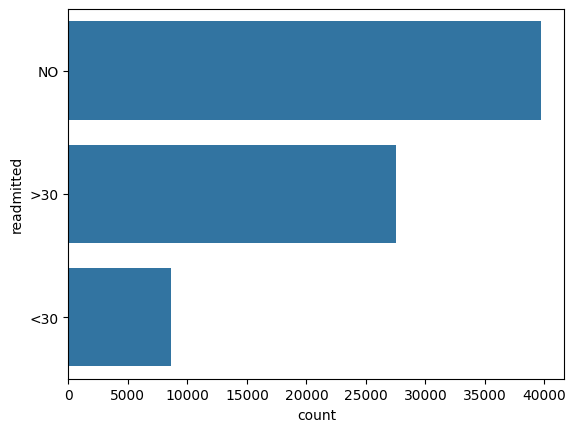

In [22]:
# check balance of the target variable
df['readmitted'].value_counts()

# plot the target variable
sns.countplot(df['readmitted'])
plt.show()